# Lasso Notebook

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('/Users/Eugene/OneDrive/ML/ML_Project/Group/housing.csv', index_col=0)
housing.shape

(2578, 167)

In [27]:
housetarg = pd.Series(housing.SalePrice_Log, name='target')
housefeature = housing.drop('SalePrice_Log',axis=1)

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(housefeature, housetarg)
Xtrain.shape, Xtest.shape

In [33]:
import numpy as np
alphas = np.linspace(0.001,10,100)

### Lasso Gridsearch CV

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#randomized is faster
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso(normalize=True)

In [72]:
grid = GridSearchCV(estimator=lasso, param_grid={'alpha':alphas}, cv=10, return_train_score=True)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2....
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])},
             return_train_score=True)

In [82]:
grid.score(Xtest,ytest)

0.8150997219334934

In [76]:
best_model = grid.best_estimator_
best_model.score(Xtest, ytest)

0.8150997219334934

In [84]:
print(grid.best_score_)
print(grid.best_params_)

0.8641956550086276
{'alpha': 0.001}


In [ ]:
print(grid.cv_results_.keys())
print(grid.cv_results_)

In [78]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.014322,0.002962,0.003141,0.002527,0.001,{'alpha': 0.001},0.847024,0.874326,0.875806,0.873436,0.858280,0.872171,0.863711,0.893189,0.849160,0.834854,0.864196,0.016261,1,0.869637,0.867315,0.86975,0.865814,0.866713,0.864298,0.867341,0.865514,0.868829,0.868686,0.86739,0.001744
1,0.010622,0.001607,0.003099,0.001985,0.102,{'alpha': 0.10200000000000001},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.010270,0.001280,0.003049,0.002339,0.203,{'alpha': 0.203},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.010692,0.001124,0.003482,0.002379,0.304,{'alpha': 0.30400000000000005},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.010285,0.000926,0.003179,0.003307,0.405,{'alpha': 0.405},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.011358,0.002064,0.001818,0.001962,9.596,{'alpha': 9.596},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
96,0.010368,0.001458,0.003799,0.002237,9.697,{'alpha': 9.697000000000001},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
97,0.010778,0.001563,0.002733,0.001813,9.798,{'alpha': 9.798},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
98,0.010501,0.002100,0.002627,0.003156,9.899,{'alpha': 9.899000000000001},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [79]:
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# look for the best test set performance

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.014322,0.002962,0.003141,0.002527,0.001,{'alpha': 0.001},0.847024,0.874326,0.875806,0.873436,0.858280,0.872171,0.863711,0.893189,0.849160,0.834854,0.864196,0.016261,1,0.869637,0.867315,0.86975,0.865814,0.866713,0.864298,0.867341,0.865514,0.868829,0.868686,0.86739,0.001744
63,0.010271,0.000605,0.003003,0.001850,6.364,{'alpha': 6.364000000000001},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
73,0.010096,0.000498,0.002808,0.002881,7.374,{'alpha': 7.3740000000000006},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
72,0.010277,0.001718,0.003733,0.002921,7.273,{'alpha': 7.273000000000001},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
71,0.010949,0.002089,0.003553,0.002456,7.172,{'alpha': 7.172000000000001},-0.002731,-0.000102,-0.000446,-0.000893,-0.007221,-0.003430,-0.002500,-0.001291,-0.001199,-0.011676,-0.003149,0.003448,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


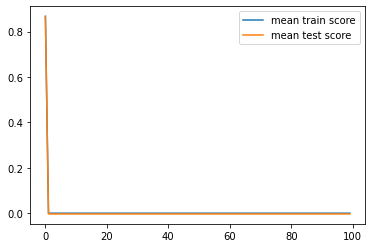

In [80]:
cv_results['mean_train_score'].plot(label='mean train score')
cv_results['mean_test_score'].plot(label='mean test score')
plt.legend(loc=1)

### Lasso model (user provides alpha)

In [42]:
lasso2 = Lasso(alpha=0.001, normalize=True)
lasso2.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [43]:
lasso2.fit(Xtrain,ytrain)

Lasso(alpha=0.001, normalize=True)

In [53]:
print('Train score: ', lasso2.score(Xtrain,ytrain))
print('Test score: ', lasso2.score(Xtest,ytest))

Train score:  0.862928167056262
Test score:  0.8150997219334934


In [46]:
lasso2.score(Xtest,ytest)

0.8150997219334934

In [86]:
print('the intercept is: %.2f' %(lasso2.intercept_))
coefs = pd.Series(lasso2.coef_, index=housefeature.columns)

the intercept is: 5.19


In [92]:
coefs.sort_values(ascending=False).head(15)

GrLivArea_Log           0.328279
OverallQual             0.089394
LotArea_Log             0.041643
GarageCars              0.037038
KitchenQual             0.027080
Fireplaces              0.008819
YearBuilt               0.001020
YearRemodAdd            0.000619
BsmtQual                0.000571
TotalBsmtSF             0.000093
BsmtFinSF1              0.000057
Exterior1st__ImStucc    0.000000
Exterior1st__MetalSd   -0.000000
Exterior1st__Plywood   -0.000000
MasVnrType__BrkFace     0.000000
dtype: float64

### Calculate RMSE

In [98]:
mse = np.mean((lasso2.predict(Xtest)-ytest)**2)
mse

0.03107515020465086

In [101]:
RMSE = np.sqrt(mse)
RMSE

0.1762814516750156

### Using `cross_val_score`

In [66]:
import sklearn.model_selection as ms
scores = ms.cross_val_score(estimator=lasso2, X=Xtrain, y=ytrain, cv=5)
scores = pd.Series(scores)

In [67]:
print(scores.round(3))
print('-'*40)
print('Score Mean %.3f' %(scores.mean()))
print('Score std deviation: %.3f' %(scores.std()))

0    0.865
1    0.879
2    0.869
3    0.882
4    0.846
dtype: float64
----------------------------------------
Score Mean 0.868
Score std deviation: 0.014
